In [1]:
from paper_plots import plot_hp_convergence
import numpy as np
from domains import Waveguide, ScattererShape, ScattererType
from FEM_solution import FEM_solution
from Trefft_tools import  TrefftzSpace, AssembleMatrix, AssembleRHS, Assemble_blockMatrix

from Trefft_tools import TrefftzFunction
#this should be a "solve system"
from scipy.sparse.linalg import spsolve 


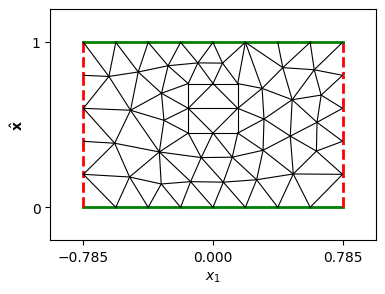

In [63]:
kappa = 8.
R = 2*np.pi/kappa
H = 1.

c = (0,0.6*H)
Domain = Waveguide(R=R,H=H)

rad = 0.3*H
length = rad
width = rad

scatterer_shape = ScattererShape.RECTANGLE
scatterer_type = ScattererType.PENETRABLE

# Domain.add_scatterer( ScattererShape.CIRCLE, ScattererType.SOUND_SOFT, (c, rad))
Domain.add_scatterer( scatterer_shape=scatterer_shape, scatterer_type=scatterer_type, params=(c, rad, rad))
# Domain.add_fine_mesh_region(h_min=0.02)

Domain.generate_mesh(h_max=H/5)
Domain.plot_mesh()

In [67]:
Ny = 50
Nx = 10*Ny
x = np.linspace(-R,R,Nx)
y = np.linspace(0,H,Ny)
X, Y = np.meshgrid(x,y)
t = 0
N = 9 + 0j
N = 9

Z = FEM_solution( R=R, H=H, params={"c":c, "height" : length, "width" : width}, scatterer_shape=scatterer_shape, scatterer_type=scatterer_type, 
                 n=t,k_e=kappa,k_i= np.sqrt(N)*kappa, X=X, Y=Y, delta_PML=0.5*R, alpha=0.5*(4+2*1j))

NDOF: 45416


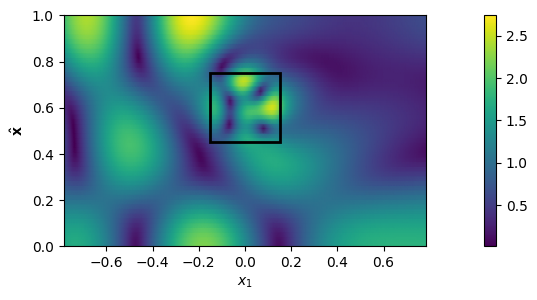

In [68]:
Domain.plot_field(X, Y, np.abs(Z))

In [69]:
Nth = 15
th_0 = np.e/np.pi
th_0 = 0.
V = TrefftzSpace(Domain=Domain, DOF_per_element=Nth, kappa=kappa, n= {"Omega_i" : N, "Omega_e" : 1}, th0=th_0 )
N_modes = 15 #Number of modes for the DtN map
# "UWVF" parameters
a = 0.5
b = 0.5
d_1 = 0.5
d_2 = 0.5
A_old = AssembleMatrix(V=V, Edges=Domain.Edges, H=H, Np=N_modes, a=a, b=b, d_1=d_1, d_2=d_2)
A_block = Assemble_blockMatrix(V=V, Edges=Domain.Edges, th_0=th_0, H=H, k=kappa, N_p=Nth, a=a, b=b, d_1=d_1, d_2=d_2, N_DtN=N_modes)

NDOF = A_block.shape[0]
print(f'{NDOF} degrees of freedom.\n Matrix with {np.count_nonzero(A.toarray())} non-zero entries from a total of {NDOF**2}.\n "fullness" ratio: {np.count_nonzero(A.toarray())/NDOF**2 * 100 : .2f}%')

phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.int64(1)
phi.n=np.int64(1)
psi.n=np.i

In [70]:
B = AssembleRHS(V, Domain.Edges, kappa, H, d_2=d_2, t = t)
from Trefft_tools import TrefftzFunction
#this should be a "solve system"
from scipy.sparse.linalg import spsolve 
A = A_block.tocsc()
DOFs = spsolve(A,B)
f = TrefftzFunction(V,DOFs)

In [71]:
u_Trefft =  np.reshape([ f(x_, y_) for x_, y_ in zip( X.ravel(), Y.ravel()) ], [Ny,Nx])


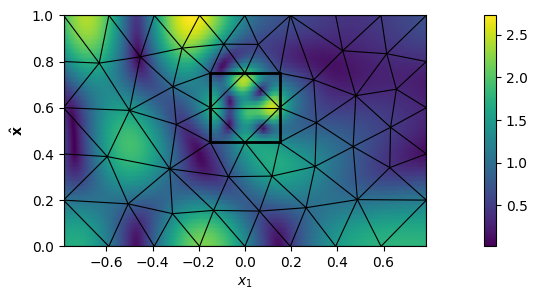

In [72]:
Domain.plot_field(X,Y,np.abs(u_Trefft), show_edges=True)


The relative error is:  1.49e-02


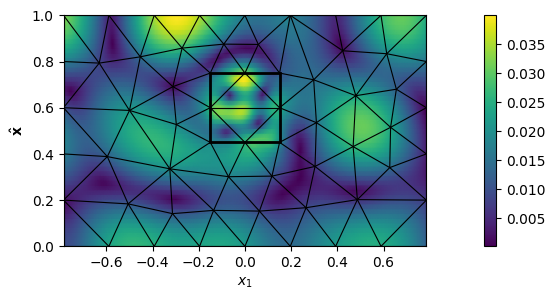

In [73]:
Domain.plot_field(X,Y,np.abs(u_Trefft - Z), show_edges=True)
print(f'The relative error is: {Domain.L2_norm(X,Y,np.abs(u_Trefft - Z))/Domain.L2_norm(X,Y,np.abs(Z)) : .2e}')

In [74]:
A_old = A_old.tocsc()
DOFs = spsolve(A_old,B)
f = TrefftzFunction(V,DOFs)

The relative error is:  1.49e-02


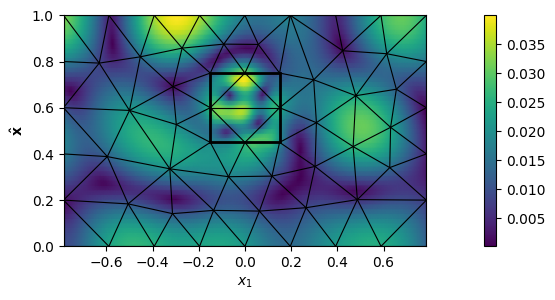

In [75]:
u_Trefft_old =  np.reshape([ f(x_, y_) for x_, y_ in zip( X.ravel(), Y.ravel()) ], [Ny,Nx])
Domain.plot_field(X,Y,np.abs(u_Trefft_old - Z), show_edges=True)
print(f'The relative error is: {Domain.L2_norm(X,Y,np.abs(u_Trefft_old - Z))/Domain.L2_norm(X,Y,np.abs(Z)) : .2e}')


The relative error is: 4.368049142183809e-07


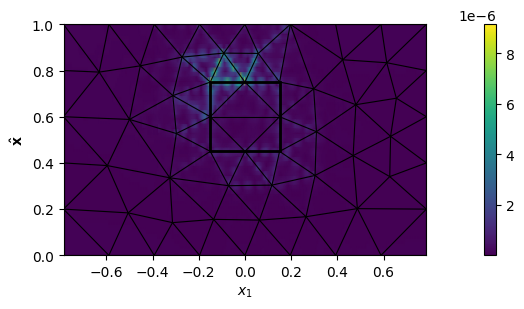

In [76]:
Domain.plot_field(X,Y,np.abs(u_Trefft_old - u_Trefft), show_edges=True)
print(f'The relative error is: {Domain.L2_norm(X,Y,np.abs(u_Trefft_old - u_Trefft))/Domain.L2_norm(X,Y,np.abs(Z))}')


In [77]:
np.sum(np.abs(A - A_old))

np.float64(4.4419672908943705e-11)

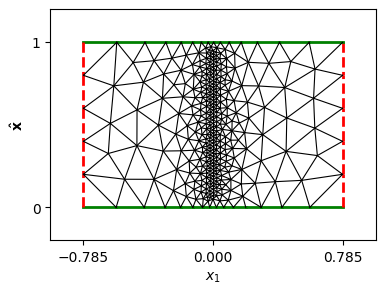

In [78]:
kappa = 8.
R = 2*np.pi/kappa
H = 1.

Domain = Waveguide(R=R,H=H)
Domain.add_fine_mesh_region(h_min=0.02)

Domain.generate_mesh(h_max=H/5)
Domain.plot_mesh()

working on refinement: N=3
h_max=np.float64(0.4067989388936703)
Initial refinement:
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=4
h_max=np.float64(0.3389150489561276)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=5
h_max=np.float64(0.2898130637277952)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=6
h_max=np.float64(0.236847643510049)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=7
h_max=np.float64(0.2030490519562134)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=8
h_max=np.float64(0.17665355176927594)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=9
h_max

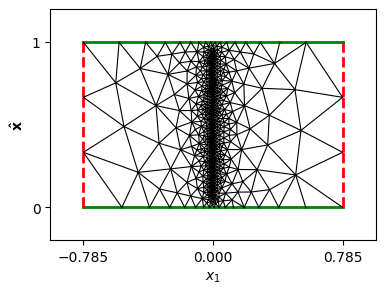

In [2]:
refinements = range(3,10,1)
N_ths = [3,5,7,9,11,13,15]


N_ref = len(refinements)
N_N_th = len(N_ths)

hs = np.zeros((N_ref), dtype=np.float64)
Hs = np.zeros((N_ref), dtype=np.float64)

conds = np.zeros((N_ref,N_N_th), dtype=np.float64)
errors = np.zeros((N_ref,N_N_th), dtype=np.float64)

factor = 8/8

kappa = factor*8.

R = factor*2*np.pi/kappa
H = 1.

Ny = 100
Nx = int(R/H*Ny)

x = np.linspace(-R,R,Nx)
y = np.linspace(0,H,Ny)
X, Y = np.meshgrid(x,y)

t = 1
beta = np.emath.sqrt(kappa**2 - (t*np.pi/H)**2)
u_exact = np.exp(1j*beta*X)*np.cos(t*np.pi*Y/H)


for (i,N) in enumerate(refinements):
    print(f"working on refinement: {N=}")
    h = H/N
    hs[i] = h
   
    Domain = Waveguide(R=R,H=H) 
    Domain.add_fine_mesh_region(factor = 0.9, h_min = 0.01)

    Domain.generate_mesh(h_max=h)

    side_ls = np.array([E.l for E in Domain.Edges])
    h_max = np.max(side_ls)
    Hs[i] = h_max
    print(f'{h_max=}')

    if i == 0:
        print('Initial refinement:')
        Domain.plot_mesh()

    for (j,Nth) in enumerate(N_ths):
        print(f"N_theta={Nth}...")
        th_0 = np.e/np.pi # no correct direction in the basis
        #th_0 = 0
        V = TrefftzSpace(Domain, Nth, kappa=kappa, n={"Omega_i" : 1 , "Omega_e" : 1}, th0=th_0 )
        N_modes = 15 #Number of modes for the DtN map
        # "UWVF" parameters
        a = 0.5
        b = 0.5
        d_1 = 0.5
        d_2 = 0.5

        A = Assemble_blockMatrix( V=V, Edges=Domain.Edges, H=H, k=kappa, N_p = Nth, th_0=th_0, a=a, b=b, d_1=d_1, d_2=d_2, N_DtN=N_modes)
        # B = AssembleGreenRHS_left(V = V, Edges=Domain.Edges, k=kappa_e, H=H, d_2=d_2, x_0 = c[0], y_0 = c[1], M = M)
        B = AssembleRHS(V=V, Edges=Domain.Edges, k=kappa, H=H, d_2=1/2, t=t)
        A = A.tocsc()
        
        DOFs = spsolve(A,B)
        f = TrefftzFunction(V,DOFs)

        u_Trefft =  np.reshape([ f(x_, y_) for x_, y_ in zip( X.ravel(), Y.ravel()) ], [Ny,Nx])
        errors[i,j] = Domain.L2_norm(X,Y,u_exact-u_Trefft)/Domain.L2_norm(X,Y,u_exact)


In [82]:
import matplotlib.pyplot as plt 

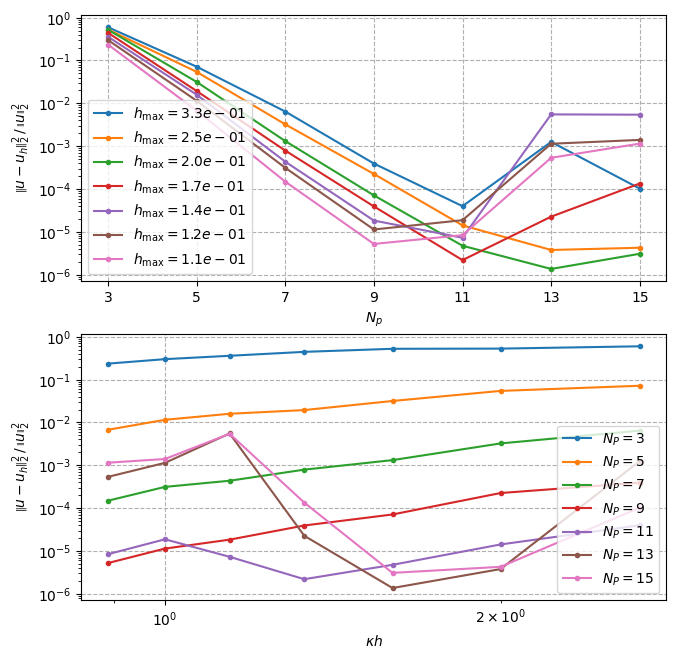

In [83]:
plot_hp_convergence(errors=errors, hs=hs, N_ths=N_ths, kappa_e=kappa, N_modes=N_modes, H=H)
#plt.savefig('fine_barrier_raw.png')

In [84]:
np.savez(file='fine_barrier_raw.npz', errors=errors, hs = hs, N_ths=N_ths)

working on refinement: N=6
h_max=np.float64(0.24691193897502972)
Initial refinement:
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=7
h_max=np.float64(0.2052507504617864)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=8
h_max=np.float64(0.1773973634113433)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=9
h_max=np.float64(0.16158061930260545)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=10
h_max=np.float64(0.1401366673927238)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=11
h_max=np.float64(0.1296232343373048)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=12


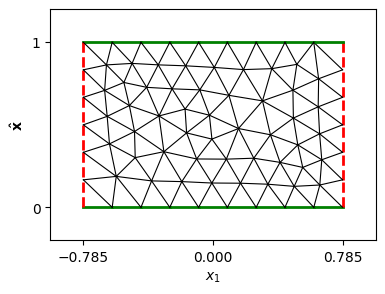

In [16]:
from exact_solutions import GreenFunctionModes
from Trefft_tools import AssembleGreenRHS_left

refinements = range(6,13,1)
N_ths = [3,5,7,9,11,13,15]


N_ref = len(refinements)
N_N_th = len(N_ths)

hs = np.zeros((N_ref), dtype=np.float64)
Hs = np.zeros((N_ref), dtype=np.float64)

conds = np.zeros((N_ref,N_N_th), dtype=np.float64)
errors = np.zeros((N_ref,N_N_th), dtype=np.float64)

factor = 8/8

kappa_e = factor*8.
lambda_e = 2*np.pi/kappa_e
R = factor*lambda_e
H = 1.


c = (-1.5*R,0.3*H)


Ny = 100
Nx = int(R/H*Ny)

x = np.linspace(-R,R,Nx)
y = np.linspace(0,H,Ny)
X, Y = np.meshgrid(x,y)

M = 20
u_exact = GreenFunctionModes(k=kappa_e, H=H, XY=np.column_stack([X.ravel(), Y.ravel()]), x_0=c[0], y_0=c[1], M = M).reshape(X.shape)


for (i,N) in enumerate(refinements):
    print(f"working on refinement: {N=}")
    h = H/N
    hs[i] = h
   
    Domain = Waveguide(R=R,H=H) 
    Domain.generate_mesh(h_max=h)

    side_ls = np.array([E.l for E in Domain.Edges])
    h_max = np.max(side_ls)
    Hs[i] = h_max
    print(f'{h_max=}')

    if i == 0:
        print('Initial refinement:')
        Domain.plot_mesh()

    for (j,Nth) in enumerate(N_ths):
        print(f"N_theta={Nth}...")
        th_0 = 2*np.e/np.pi # no correct direction in the basis
        #th_0 = 0.
        V = TrefftzSpace(Domain, Nth, kappa=kappa_e, n={"Omega_i" : 1 , "Omega_e" : 1}, th0=th_0 )
        N_modes = 15 #Number of modes for the DtN map
        # "UWVF" parameters
        a = 0.5
        b = 0.5
        d_1 = 0.5
        d_2 = 0.5

        A = Assemble_blockMatrix( V=V, Edges=Domain.Edges, H=H, k=kappa_e, N_p = Nth, th_0=th_0, a=a, b=b, d_1=d_1, d_2=d_2, N_DtN=N_modes) 
        B = AssembleGreenRHS_left(V=V, Edges=Domain.Edges, k=kappa_e, H=H, d_2=d_2, x_0 = c[0], y_0=c[1], M=M)
        A = A.tocsc()
        
        DOFs = spsolve(A,B)
        f = TrefftzFunction(V,DOFs)

        u_Trefft =  np.reshape([ f(x_, y_) for x_, y_ in zip( X.ravel(), Y.ravel()) ], [Ny,Nx])
        errors[i,j] = Domain.L2_norm(X,Y,u_exact-u_Trefft)/Domain.L2_norm(X,Y,u_exact)


In [18]:
np.savez('green_new.npz', errors=errors, hs=hs, N_ths=N_ths)

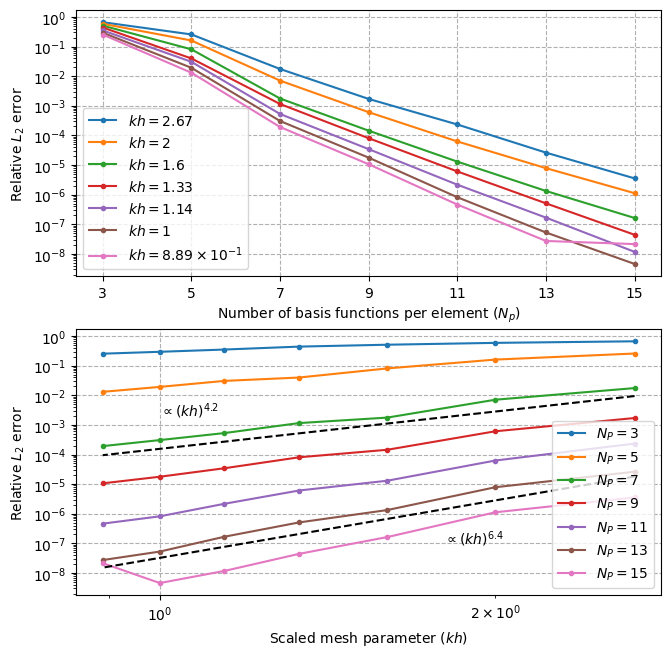

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
from paper_plots import plot_hp_convergence
from scipy.stats import linregress

def add_trend_line(IDs: list[int], xs, ys, errors, k, hs, ax):
    for ID, x, y in zip(IDs, xs, ys):
        result = linregress(np.log(k*hs), np.log(errors[:, ID]))
        m = result.slope
        n = result.intercept
        ax.plot(k*hs, 0.5*np.exp(n)*(k*hs)**m, '--k')
        ax.text(x,y,f'$\\propto (kh)^{{{m : .1f}}}$')


kappa_e = 8.
N_modes = 15
H = 1.

data = np.load('green_original.npz')
errors = data['errors']
hs = data['hs']
N_ths = data['N_ths']
ax = plot_hp_convergence(errors=errors, hs=hs, N_ths=N_ths, kappa_e=kappa_e, N_modes=N_modes, H=H)
add_trend_line(IDs=[2,5],xs = [1.,1.8], ys=[2E-3, 1E-7], errors=errors, k=kappa_e, hs=hs, ax = ax[1] )
plt.savefig('with_slopes_correct.pdf')

In [7]:
result = linregress(np.log(kappa_e*hs), np.log(errors[:,-1]))
m = result.slope
n = result.intercept
print(f'{m=} {n=}')

m=np.float64(5.91349735875326) n=np.float64(-18.344226773536295)


$$\log(E) = n + m \log(kh)$$
$$E = e^n*(kh)^m$$


<Axes: xlabel='$x_1$', ylabel='$\\mathbf{\\hat{x}}$'>

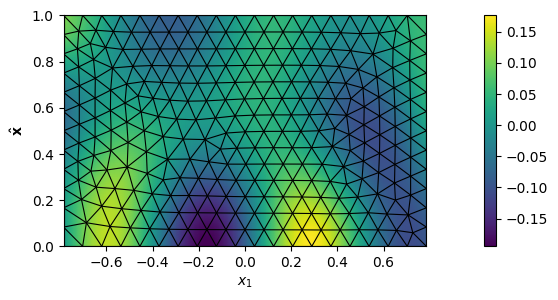

In [21]:
Domain.plot_field(X,Y,np.real(u_Trefft), show_edges=True)

# NtD Dependency

In [2]:
from exact_solutions import GreenFunctionModes
from Trefft_tools import AssembleGreenRHS_left

ks = [ 8, 12, 16, 20, 24, 28, 32]
ntds = np.arange(2,14)
N_ks = len(ks)
N_ntds = len(ntds)


errors = np.zeros((N_ks, N_ntds), dtype=np.float64)

for i, kappa_e in enumerate(ks):
    print(f'{kappa_e=}')    
    lambda_e = 2*np.pi/kappa_e
    R = 4*lambda_e
    H = 1.


    c = (-1.5*R,0.3*H)


    Ny = 100
    Nx = int(R/H*Ny)

    x = np.linspace(-R,R,Nx)
    y = np.linspace(0,H,Ny)
    X, Y = np.meshgrid(x,y)

    M = 20
    u_exact = GreenFunctionModes(k=kappa_e, H=H, XY=np.column_stack([X.ravel(), Y.ravel()]), x_0=c[0], y_0=c[1], M = M).reshape(X.shape)

    
    h = H/10

    Domain = Waveguide(R=R,H=H) 
    Domain.generate_mesh(h_max=h)


    for (j, N_DTN) in enumerate(ntds):
        print(f"{N_DTN=}")
        th_0 = 2*np.e/np.pi # no correct direction in the basis
        #th_0 = 0.
        N_th = 13
        V = TrefftzSpace(Domain, N_th, kappa=kappa_e, n={"Omega_i" : 1 , "Omega_e" : 1}, th0=th_0 )
        N_modes = N_DTN #Number of modes for the DtN map
        # "UWVF" parameters
        a = 0.5
        b = 0.5
        d_1 = 0.5
        d_2 = 0.5

        A = Assemble_blockMatrix( V=V, Edges=Domain.Edges, H=H, k=kappa_e, N_p = N_th, th_0=th_0, a=a, b=b, d_1=d_1, d_2=d_2, N_DtN=N_modes) 
        B = AssembleGreenRHS_left(V=V, Edges=Domain.Edges, k=kappa_e, H=H, d_2=d_2, x_0 = c[0], y_0=c[1], M=M)
        A = A.tocsc()
        
        DOFs = spsolve(A,B)
        f = TrefftzFunction(V,DOFs)

        u_Trefft =  np.reshape([ f(x_, y_) for x_, y_ in zip( X.ravel(), Y.ravel()) ], [Ny,Nx])
        errors[i,j] = Domain.L2_norm(X,Y,u_exact-u_Trefft)/Domain.L2_norm(X,Y,u_exact)


kappa_e=8
N_DTN=np.int64(2)
N_DTN=np.int64(3)
N_DTN=np.int64(4)
N_DTN=np.int64(5)
N_DTN=np.int64(6)
N_DTN=np.int64(7)
N_DTN=np.int64(8)
N_DTN=np.int64(9)
N_DTN=np.int64(10)
N_DTN=np.int64(11)
N_DTN=np.int64(12)
N_DTN=np.int64(13)
kappa_e=12
N_DTN=np.int64(2)
N_DTN=np.int64(3)
N_DTN=np.int64(4)
N_DTN=np.int64(5)
N_DTN=np.int64(6)
N_DTN=np.int64(7)
N_DTN=np.int64(8)
N_DTN=np.int64(9)
N_DTN=np.int64(10)
N_DTN=np.int64(11)
N_DTN=np.int64(12)
N_DTN=np.int64(13)
kappa_e=16
N_DTN=np.int64(2)
N_DTN=np.int64(3)
N_DTN=np.int64(4)
N_DTN=np.int64(5)
N_DTN=np.int64(6)
N_DTN=np.int64(7)
N_DTN=np.int64(8)
N_DTN=np.int64(9)
N_DTN=np.int64(10)
N_DTN=np.int64(11)
N_DTN=np.int64(12)
N_DTN=np.int64(13)
kappa_e=20
N_DTN=np.int64(2)
N_DTN=np.int64(3)
N_DTN=np.int64(4)
N_DTN=np.int64(5)
N_DTN=np.int64(6)
N_DTN=np.int64(7)
N_DTN=np.int64(8)
N_DTN=np.int64(9)
N_DTN=np.int64(10)
N_DTN=np.int64(11)
N_DTN=np.int64(12)
N_DTN=np.int64(13)
kappa_e=24
N_DTN=np.int64(2)
N_DTN=np.int64(3)
N_DTN=np.int64(4)
N_DTN=np.int

In [3]:
np.savez("ntd_dependency.npz", ntds = ntds, errors = errors, ks = ks )

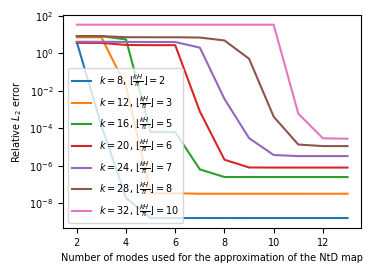

In [9]:
import matplotlib.pyplot as plt 
inches_per_dot = 1/72.27
columnwidth = 370.38374 * inches_per_dot


figure_width = 0.7*columnwidth # cm
figure_height = 0.5*columnwidth # cm

import matplotlib

matplotlib.style.use({
    "font.size" : 7
})


fig, ax = plt.subplots(figsize=(figure_width, figure_height))


for i in range(N_ks):
    plt.semilogy(ntds,errors[i,:], label=f'$k={ks[i]}$, $\\lfloor \\frac{{k H}}{{\\pi}}\\rfloor = {int(ks[i]*1/np.pi)}$')
    #plt.semilogy(ntds,errors[i,:], label=f'$k={ks[i]}$, $M = {int(ks[i]*1/np.pi)}$')

    plt.legend()
    plt.ylabel('Relative $L_2$ error')
    plt.xlabel('Number of modes used for the approximation of the NtD map')

fig.subplots_adjust(left   = 0.15,
                    bottom = 0.15,
                    right  = 0.98,
                    top    = 0.98,
                    hspace = 0.35)


plt.savefig('NtD_dependency_correct.pdf')

In [50]:
for k in ks:
    print(f'{k=}')
    for i in range(0,15):
        print(f'k_hat = {i*np.pi : .2f}, {k**2 - (i*np.pi)**2 : .2f}')

k=8
k_hat =  0.00,  64.00
k_hat =  3.14,  54.13
k_hat =  6.28,  24.52
k_hat =  9.42, -24.83
k_hat =  12.57, -93.91
k_hat =  15.71, -182.74
k_hat =  18.85, -291.31
k_hat =  21.99, -419.61
k_hat =  25.13, -567.65
k_hat =  28.27, -735.44
k_hat =  31.42, -922.96
k_hat =  34.56, -1130.22
k_hat =  37.70, -1357.22
k_hat =  40.84, -1603.96
k_hat =  43.98, -1870.44
k=12
k_hat =  0.00,  144.00
k_hat =  3.14,  134.13
k_hat =  6.28,  104.52
k_hat =  9.42,  55.17
k_hat =  12.57, -13.91
k_hat =  15.71, -102.74
k_hat =  18.85, -211.31
k_hat =  21.99, -339.61
k_hat =  25.13, -487.65
k_hat =  28.27, -655.44
k_hat =  31.42, -842.96
k_hat =  34.56, -1050.22
k_hat =  37.70, -1277.22
k_hat =  40.84, -1523.96
k_hat =  43.98, -1790.44
k=16
k_hat =  0.00,  256.00
k_hat =  3.14,  246.13
k_hat =  6.28,  216.52
k_hat =  9.42,  167.17
k_hat =  12.57,  98.09
k_hat =  15.71,  9.26
k_hat =  18.85, -99.31
k_hat =  21.99, -227.61
k_hat =  25.13, -375.65
k_hat =  28.27, -543.44
k_hat =  31.42, -730.96
k_hat =  34.56, -